**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

    1. Age: age of the patient [years]
    2. Sex: sex of the patient [M: Male, F: Female]
    3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    4. RestingBP: resting blood pressure [mm Hg]
    5. Cholesterol: serum cholesterol [mm/dl]
    6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or 8. 8. 8. depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    9. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    10. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    11. Oldpeak: oldpeak = ST [Numeric value measured in depression]
    12. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    13. HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


DATA_ROOT_PATH = "../data/raw"
FILE_NAME = 'heart.csv'
FIGSIZE=(10, 5)

file_path = os.path.join(DATA_ROOT_PATH, FILE_NAME)

In [4]:
raw_df = pd.read_csv(file_path)
raw_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [5]:
raw_df.HeartDisease = raw_df.HeartDisease.astype(str)

Attribute Information

    1. Age: возраст пациента [лет]
    2. Sex: пол пациента [М: мужской, Ж: женский]
    3. ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинозная боль, ASY: бессимптомная]
    4. RestingBP: артериальное давление в покое [мм рт. ст.]
    5. Cholesterol: сывороточный холестерин [мм/дл]
    6. FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]
    7. RestingECG: результаты электрокардиограммы в покое [Normal: норма, ST: наличие аномалии ST-T (инверсия зубца T и/или элевация ST или депрессия > 0,05 мВ), ГЛЖ: наличие вероятной или достоверной гипертрофии левого желудочка по критериям Эстеса]
    9. MaxHR: максимальная достигнутая частота сердечных сокращений [числовое значение от 60 до 202]
    10. ExerciseAngina: стенокардия нагрузки [Y: Да, N: Нет]
    11. Oldpeak: oldpeak = ST [числовое значение, измеренное при депрессии]
    12. ST_Slope: наклон сегмента ST пиковой нагрузки [Up: восходящий, Flat: плоский, Down: нисходящий]
    13. HeartDisease: класс выходного сигнала [1: заболевание сердца, 0: норма]

In [6]:
categorical_columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"] # "Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', "Oldpeak"]
target_column = 'HeartDisease'

In [7]:
raw_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


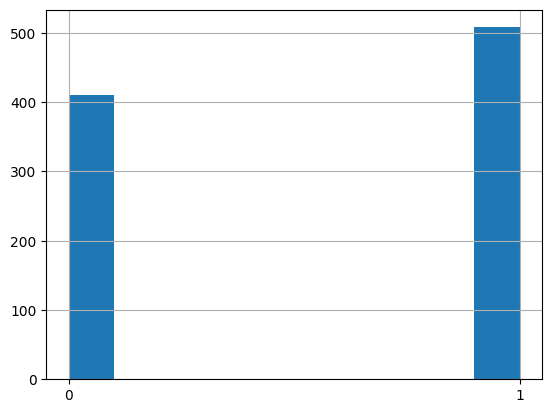

In [8]:
raw_df[target_column].hist();

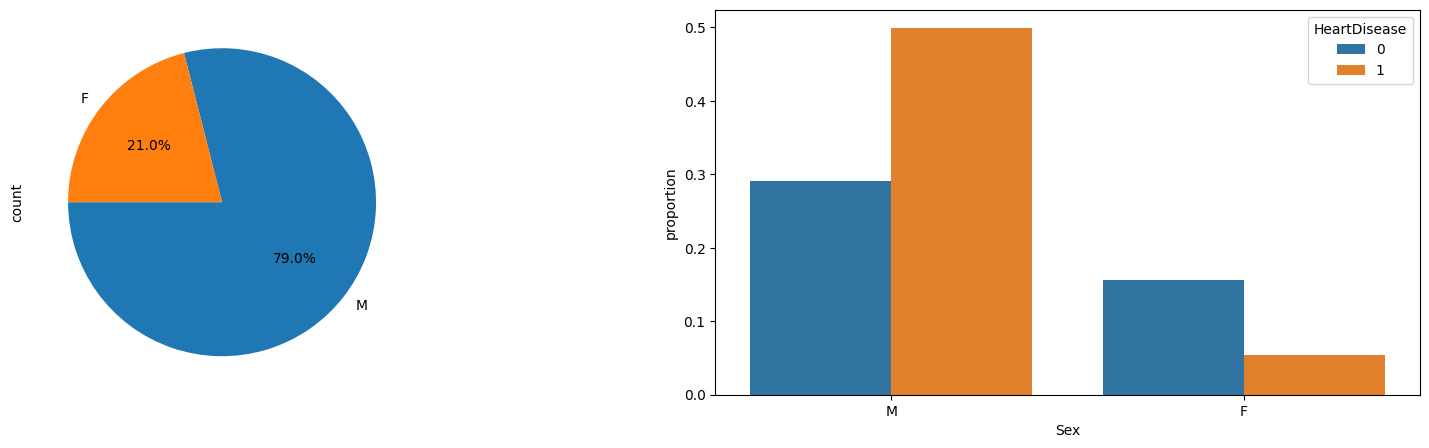

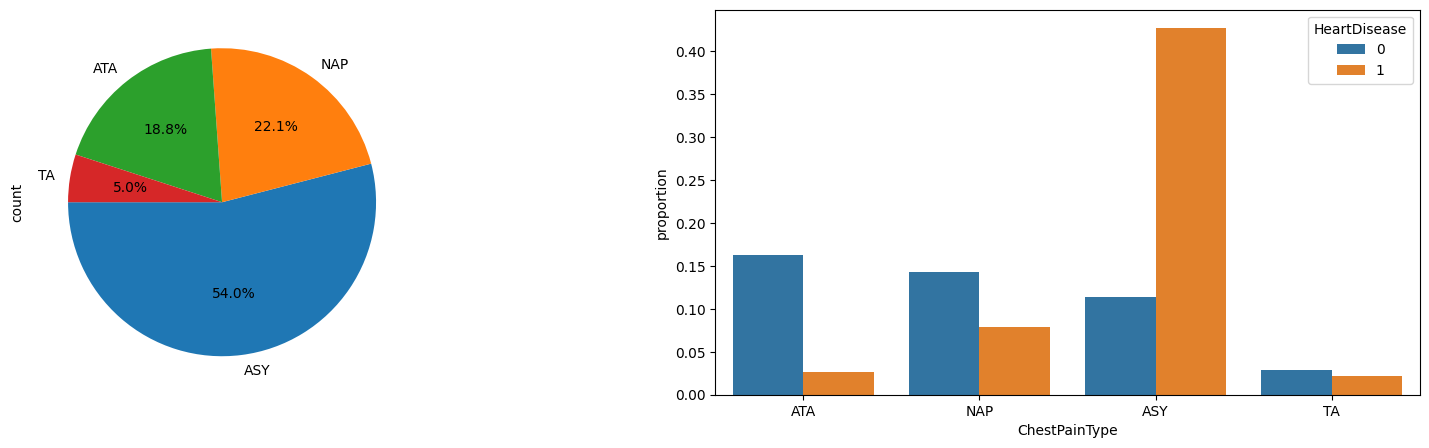

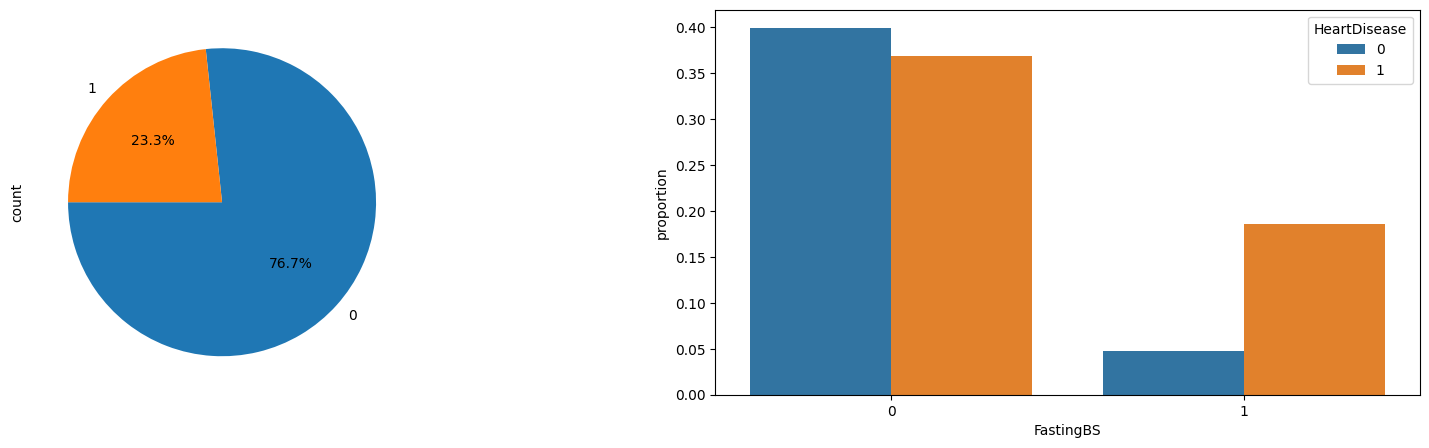

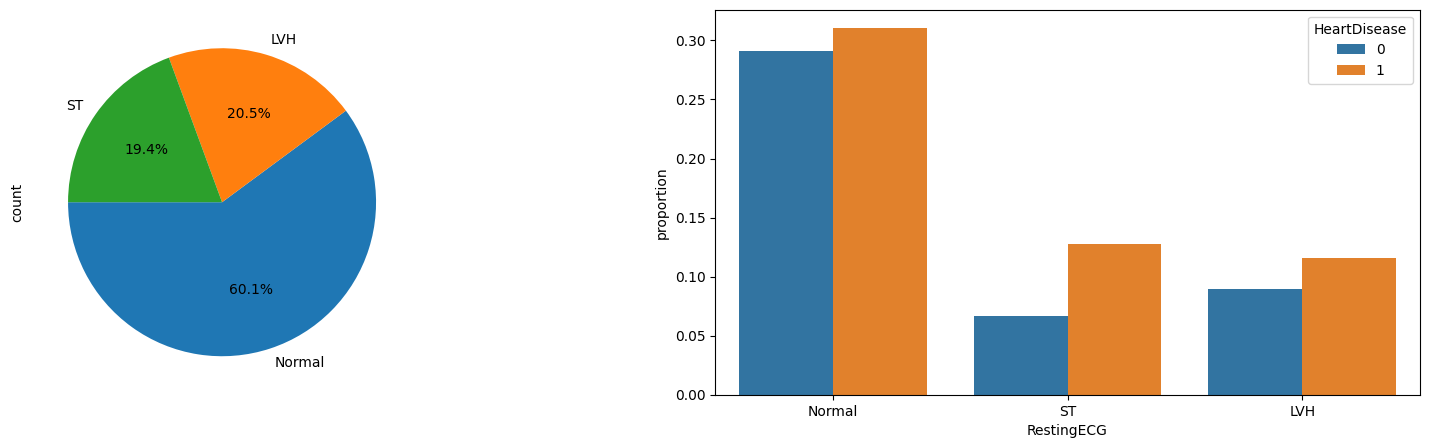

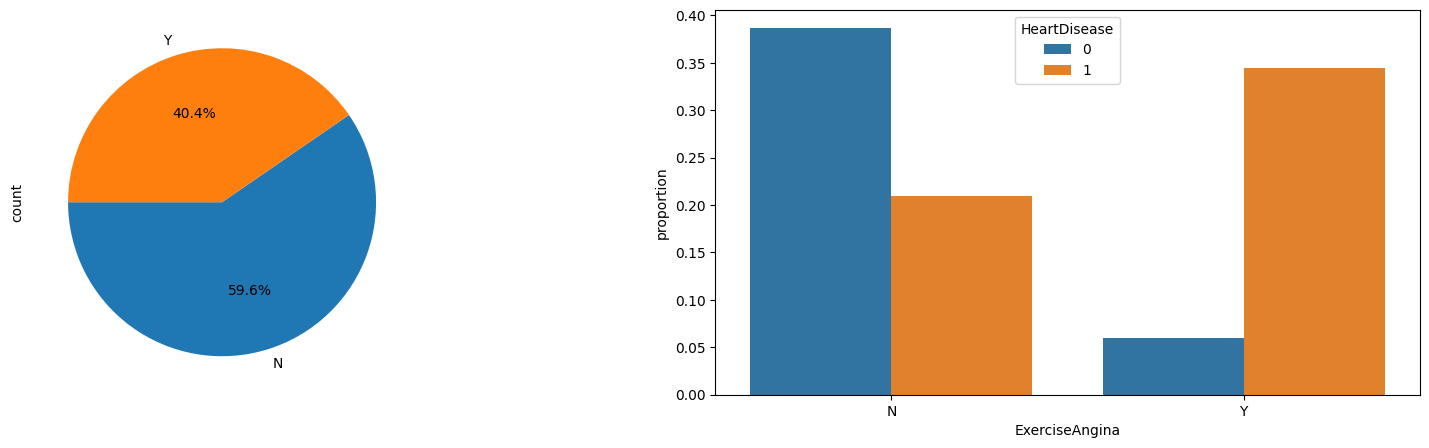

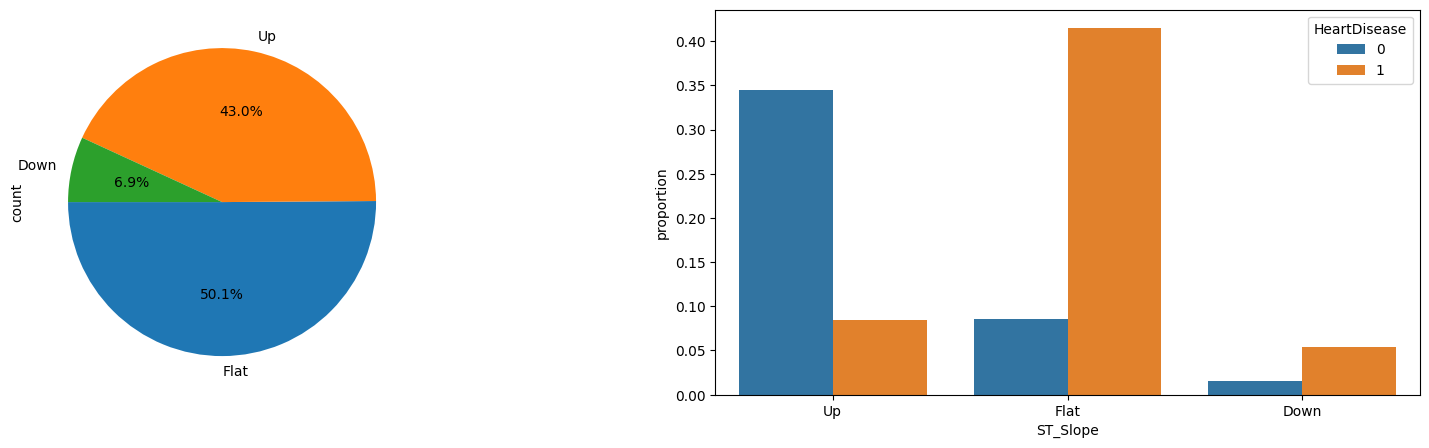

In [12]:
for i in range(len(categorical_columns)):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    fig.title = categorical_columns[i]
    raw_df[categorical_columns[i]].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, ax=ax[0])
    sns.countplot(data=raw_df, x=categorical_columns[i], stat='proportion', hue=target_column, ax=ax[1])


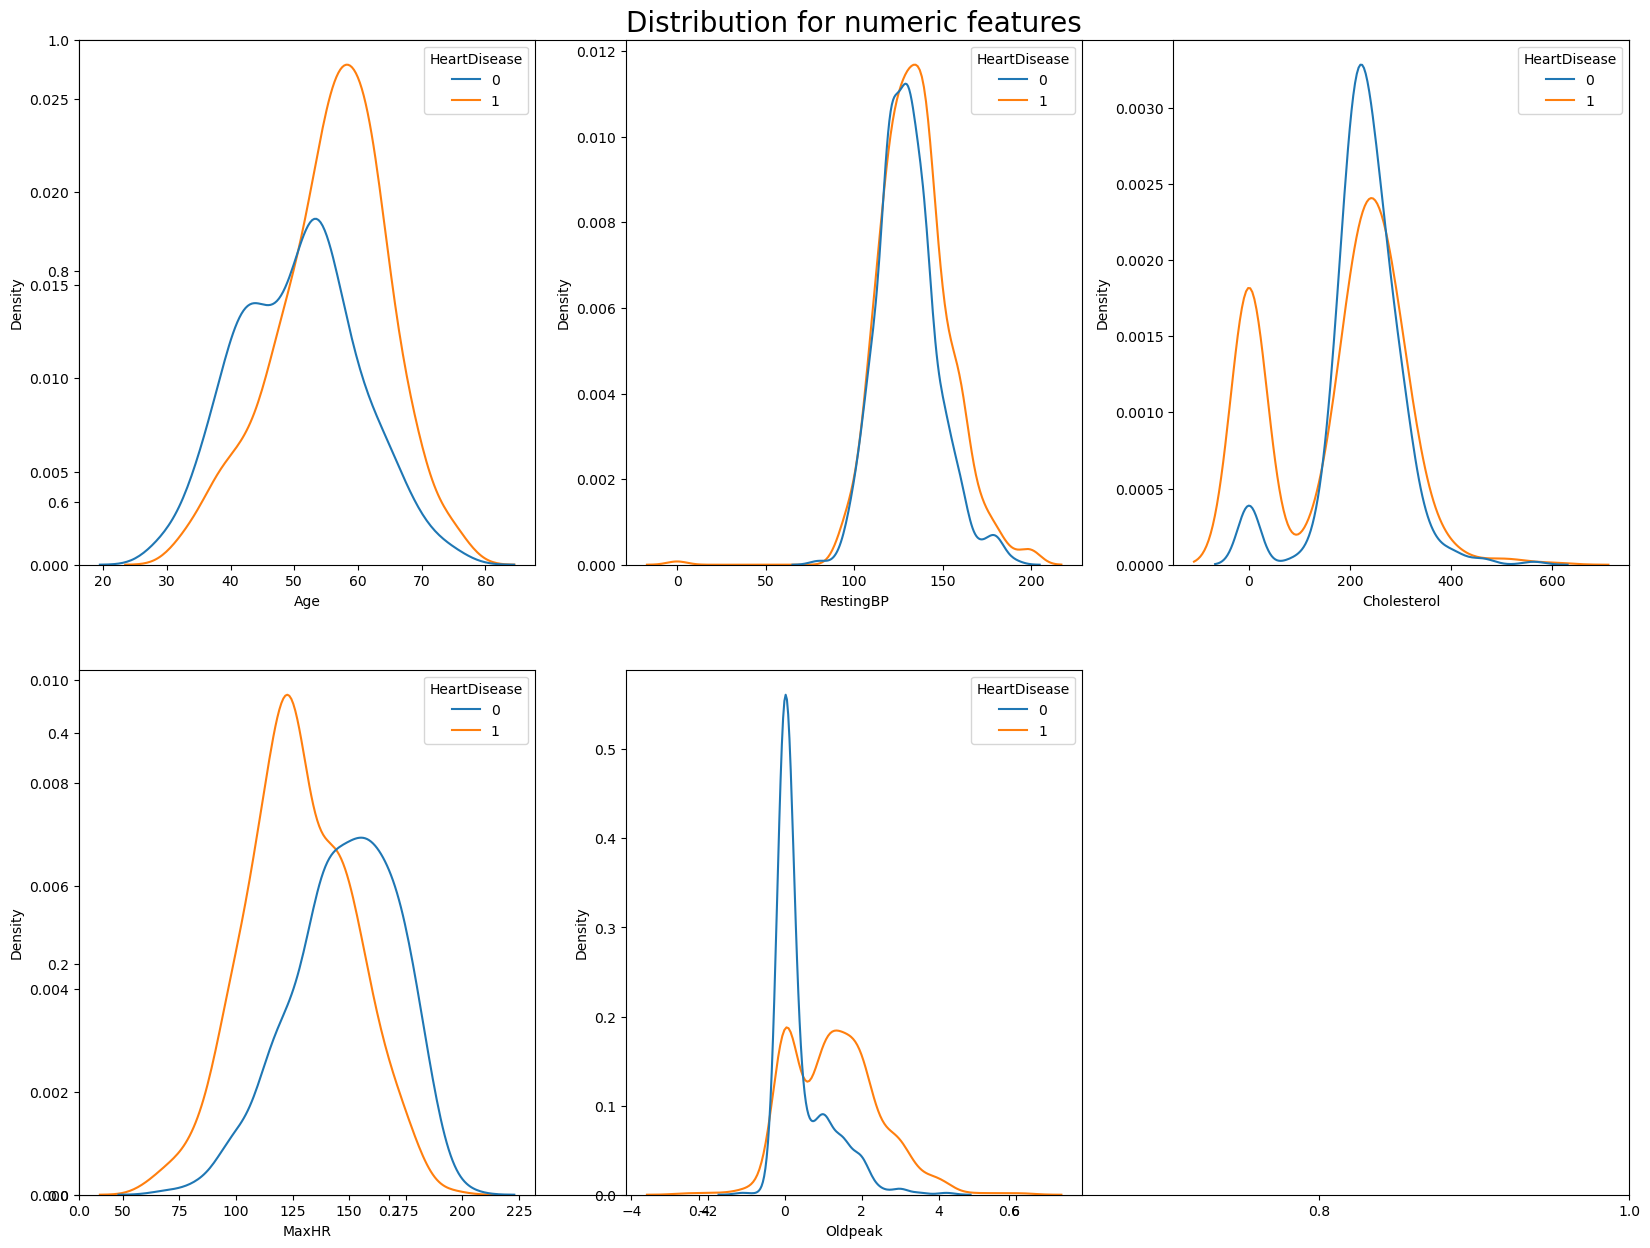

In [48]:
fig = plt.figure(figsize=(20, 15))
plt.title("Distribution for numeric features", size=20)
for i in range(len(numeric_columns)):
    ax_1 = fig.add_subplot(len(numeric_columns)//2, 3, i+1)
    sns.kdeplot(data=raw_df, x=numeric_columns[i], hue=target_column, ax=ax_1)

plt.show()

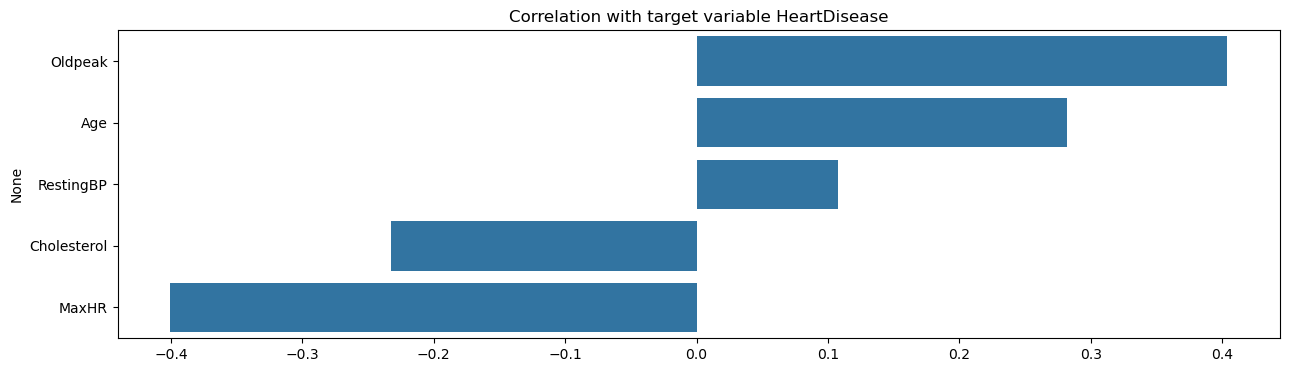

In [69]:
numeric_columns_wiht_target = numeric_columns.copy() + [target_column]
corr_coefficients = raw_df[numeric_columns_wiht_target].corr().iloc[-1, :-1].sort_values(ascending=False)
plt.figure(figsize=(15, 4))
sns.barplot(x=corr_coefficients.values, y=corr_coefficients.index)
plt.title('Correlation with target variable HeartDisease')
plt.show()

Conditions of highest chance of heart attack:

        - Sex = Male
        - ChestPainType = ASY
        - ExerciseAngina = Y
        - ST_Slope = Flat